In [ ]:
import pandas as pd
import folium

# Carregando o arquivo CSV
df = pd.read_csv('votacao-local-votacao-novo.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Adicionando marcadores com a quantidade de votos da Jhancy
for index, row in df.iterrows():
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=f"{row['nm_local_votacao']}<br>Votos da Jhancy: {row['qt_votos']}",
      icon=folium.Icon(color='blue', icon='fa-vote-yea')
  ).add_to(mapa)

# Exibindo o mapa
mapa

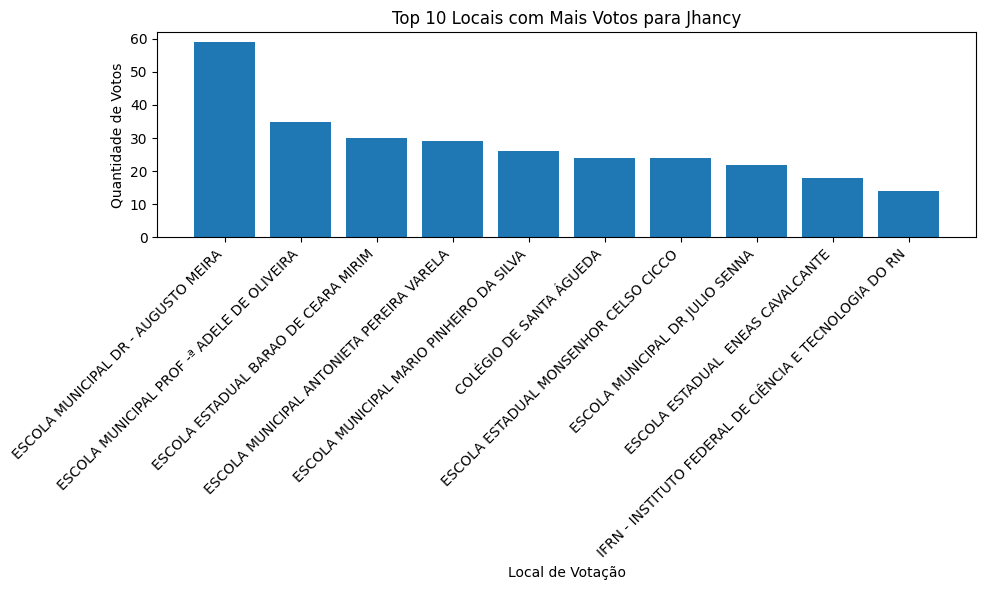

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV
df = pd.read_csv('votacao-local-votacao-novo.csv', sep=',')

# Ordenando os dados em ordem decrescente de votos da Jhancy
df_ordenado = df.sort_values(by='qt_votos', ascending=False)

# Selecionando os 5 primeiros locais
top5_locais = df_ordenado.head(10)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top5_locais['nm_local_votacao'], top5_locais['qt_votos'])
plt.xlabel('Local de Votação')
plt.ylabel('Quantidade de Votos')
plt.title('Top 10 Locais com Mais Votos para Jhancy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import folium

# Carregando o arquivo CSV
df = pd.read_csv('votacao-local-votacao-novo.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Definindo a função para obter a cor do marcador
def get_marker_color(votos):
  if votos >= 20:
    return 'darkblue'
  elif votos >= 10:
    return 'blue'
  elif votos >= 5:
    return 'lightblue'
  else:
    return 'lightgray'

# Adicionando marcadores com cores dinâmicas
for index, row in df.iterrows():
  cor_marcador = get_marker_color(row['qt_votos'])
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=f"{row['nm_local_votacao']}<br>Votos da Jhancy: {row['qt_votos']}",
      icon=folium.Icon(color=cor_marcador, icon='fa-vote-yea')
  ).add_to(mapa)

# Exibindo o mapa
mapa